# scikit-learn

### load modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

# read data

In [2]:
from sklearn import datasets

data = datasets.load_iris()
X, y = (data['data'], data['target'])

pd.DataFrame(data = np.c_[data['data'], data['target']], columns = data['feature_names'] + ['target'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# scale data

$$Z = \frac{X - \mu}{\sigma}$$

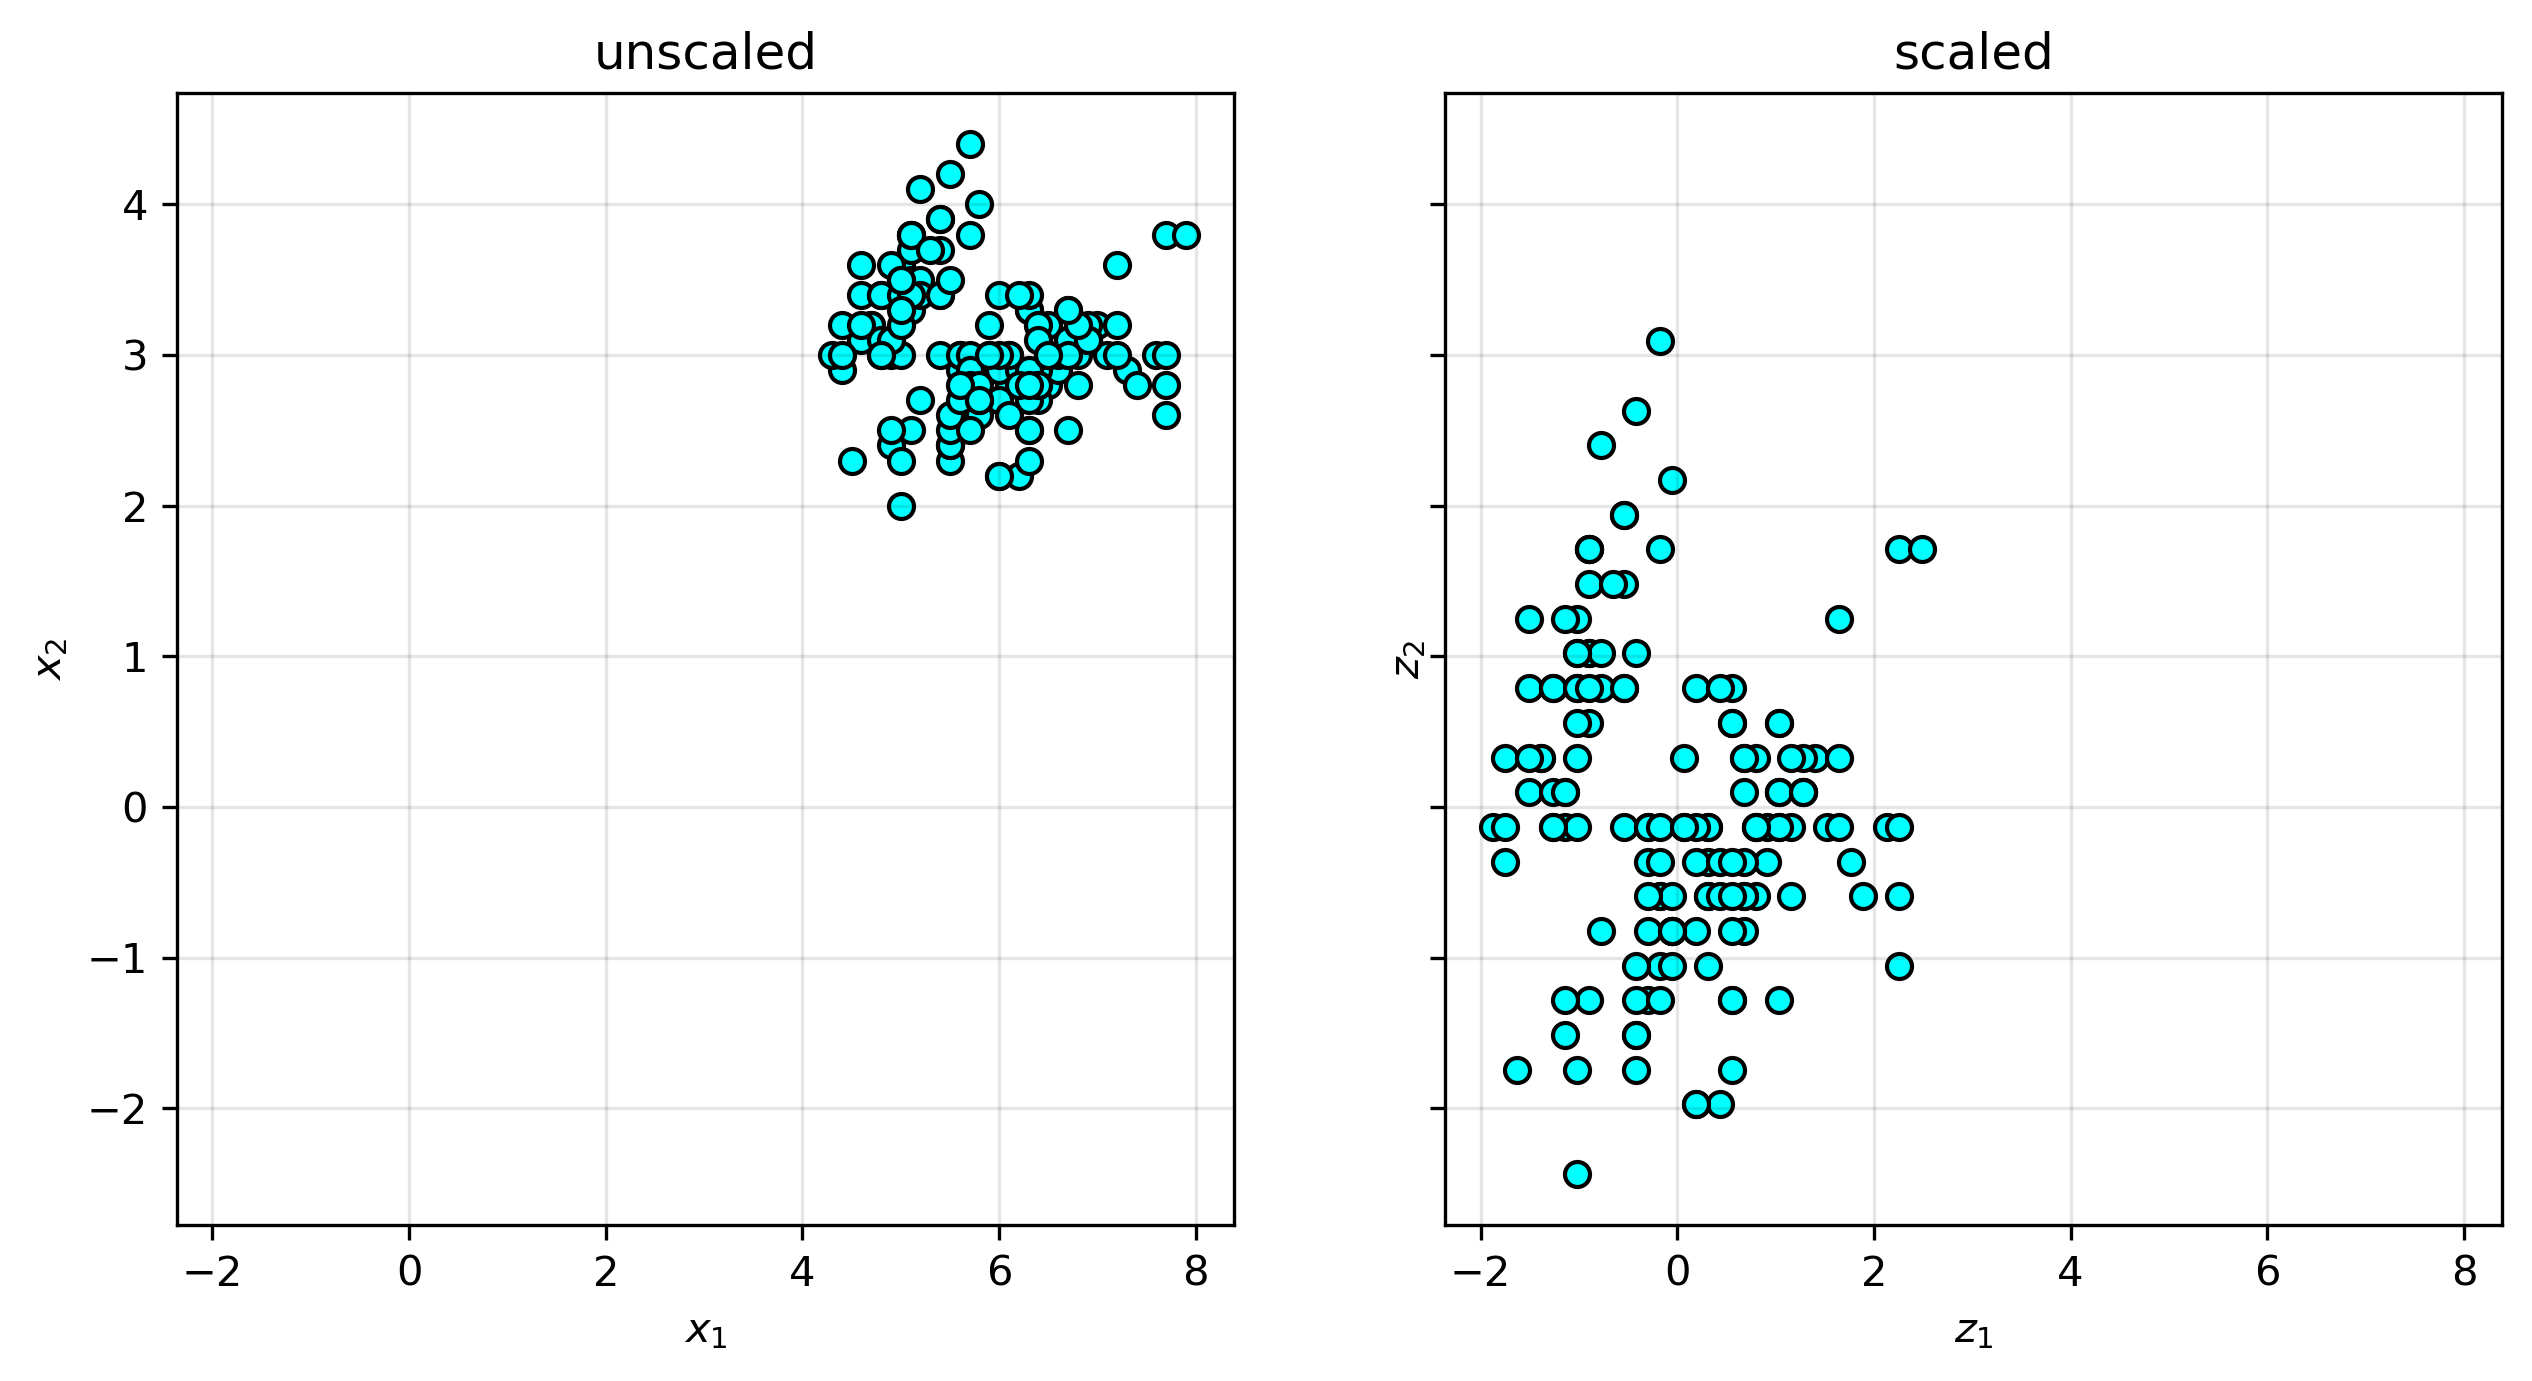

In [9]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True, dpi=150)
for header, ax, i, names in zip(["unscaled", "scaled"], axs, [X, X_scaled], [["$x_1$", "$x_2$"], ["$z_1$", "$z_2$"]]):
    ax.set_title(header)
    ax.scatter(i[:,0], i[:,1], color="cyan", edgecolor="k")
    ax.set_xlabel(names[0])
    ax.set_ylabel(names[1])
    ax.grid(color="k", alpha=0.1, zorder=0)
plt.show()

# split data into 2 subsets for training and testing

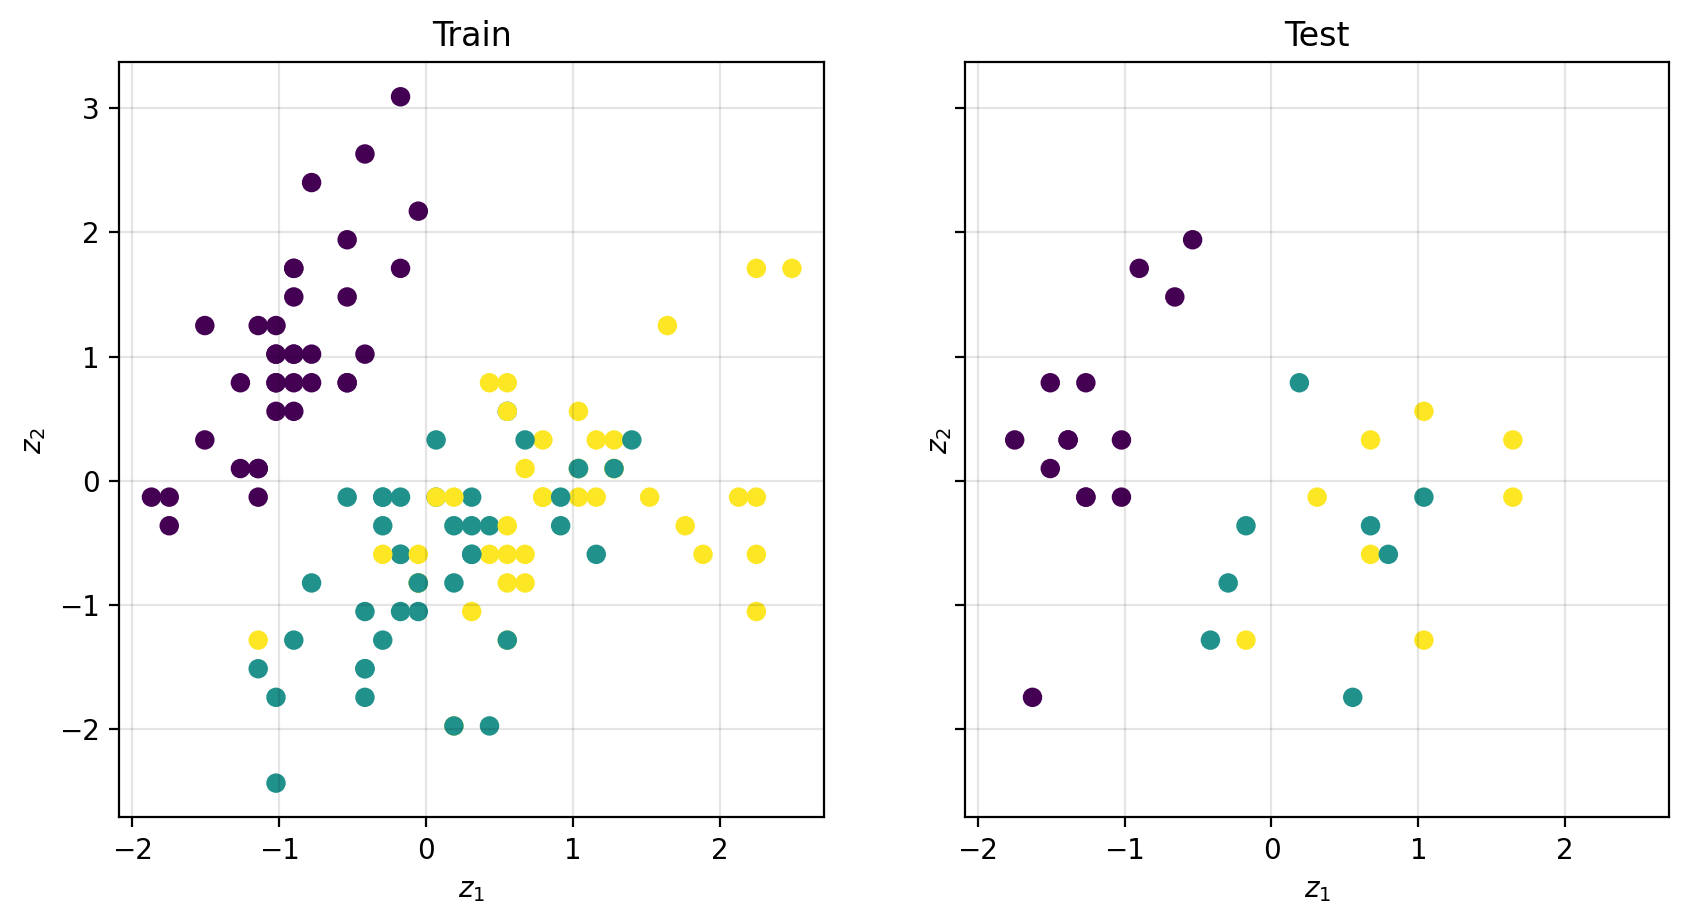

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True, dpi=100)
for header, ax, datas, colors in zip(["Train", "Test"], axs, [X_train, X_test], [y_train, y_test]):
    ax.set_title(header)
    ax.scatter(datas[:,0], datas[:,1], c=colors)
    ax.set_xlabel("$z_1$")
    ax.set_ylabel("$z_2$")
    ax.grid(color="k", alpha=0.1, zorder=0)
plt.show()

# find appropriate model-topology

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

hyper_params = {"C": [0.01, 0.1, 1., 10., 100.]}
clf = GridSearchCV(LogisticRegression(), hyper_params, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3))
clf.fit(X_train, y_train)
print("'Best' Hyperparameters for our task at hand: {}".format(clf.best_params_))

'Best' Hyperparameters for our task at hand: {'C': 10.0}


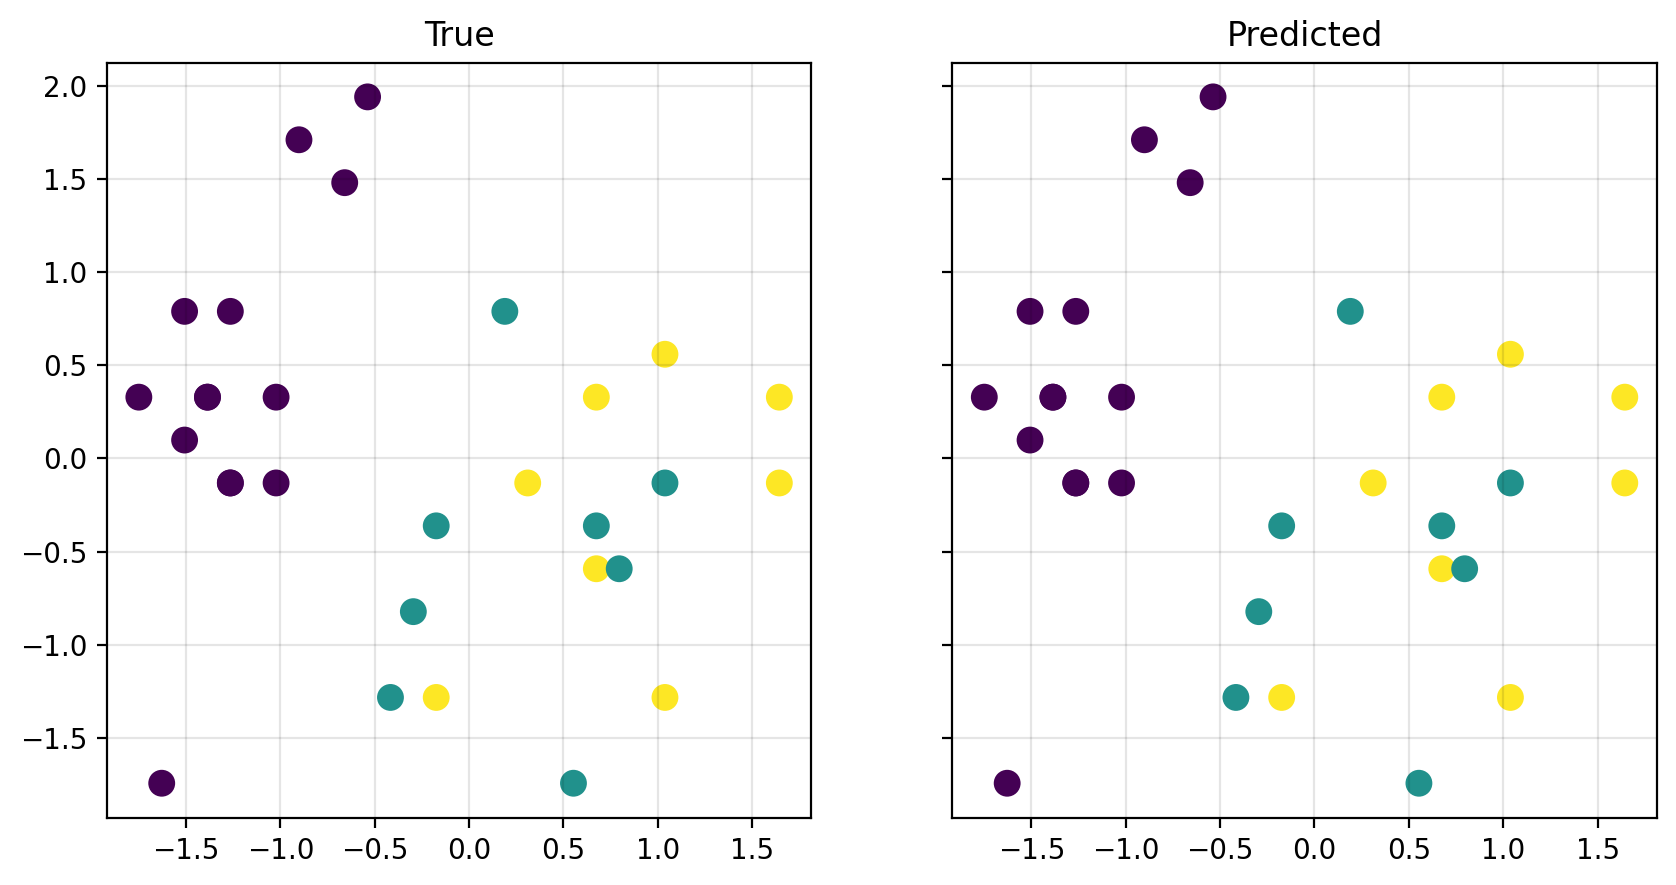

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True, dpi=100)
for header, ax, y, sct in zip(["True", "Predicted"], axs, [y_test, clf.predict(X_test)], ["Training", "Test"]):
    ax.set_title(header)
    ax.scatter(X_test[:,0], X_test[:,1], c=y, s=75)
    ax.grid(color="k", alpha=0.1, zorder=0)
plt.show()

# testing our model with test-data

In [16]:
from sklearn.metrics import accuracy_score
print("accuracy = {}".format(accuracy_score(y_test, clf.predict(X_test)).round(2)))

accuracy = 1.0
